<a href="https://colab.research.google.com/github/eduardogil11/IA-Modulo-1-Estadistica/blob/main/Workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workshop 1, Advanced AI - Statistics Module

Eduardo Rodríguez Gil - A01274913

## 2.3.1 Data collection and visualization

Import the following Python libraries:

In [18]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot

In [5]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


Download daily prices for Bitcoin from 2017:

In [2]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

Show the content of the data:

In [3]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,2.857554e+10,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,2.355572e+10,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578


Python automatically shows you only the first and last rows of the dataset. Now show the last quotations:

In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,2.857554e+10,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,2.355572e+10,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,3.712704e+10,23957.529297
2022-08-13,24507.908203,24350.863281,24384.033203,24465.693359,2.716229e+10,24465.693359


Import the matplotlib and do a plot for the Bitcoin closing prices:

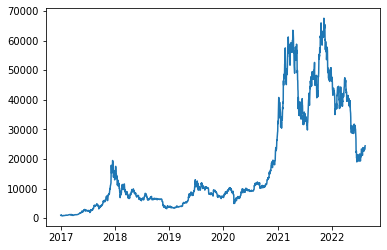

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

We can check the data types of each variable (column) in the dataset:

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2050 entries, 2017-01-01 to 2022-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2050 non-null   float64
 1   Low        2050 non-null   float64
 2   Open       2050 non-null   float64
 3   Close      2050 non-null   float64
 4   Volume     2050 non-null   float64
 5   Adj Close  2050 non-null   float64
dtypes: float64(6)
memory usage: 112.1 KB


## 2.3.2.3 Continuously compounded returns

In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:

In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-13    0.021211
Name: R, Length: 2050, dtype: float64


Now we calculate cc returns in a new column using the shift function:

In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:

In [9]:
BTC= BTC.dropna()

We can use the describe function applied to the r column as follows:

In [10]:
sumret = BTC["R"].describe()
sumret

count    2049.000000
mean        0.002425
std         0.041361
min        -0.371695
25%        -0.015882
50%         0.002217
75%         0.020958
max         0.252472
Name: R, dtype: float64

To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:

In [11]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2.716310e+09,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,1.885380e+10,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9.285290e+09,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,5.398036e+10,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,6.820456e+10,22487.388672,-0.159747,-0.174053


The worst day for the Bitcoin was March 12, 2020, which is the beginning of the COVID crisis.

To know the best days for Bitcoin:

In [12]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,1.795070e+10,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2.249260e+09,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,1.265630e+10,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,1.014672e+11,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,5.100073e+10,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,2.131505e+10,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,2.870507e+10,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1.201760e+09,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4.148070e+09,3637.520020,0.152956,0.142330


We can also get the main descriptive statistics using specific functions like:

In [25]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015612241373170004
The daily variance of Bitcoin is  0.001736585614126586
The daily standard deviation (volatility) of Bitcoin return is  0.04167236031384095
The daily median return of Bitcoin is  0.0022150257023572095


## 3.2 CHALLENGES: Histogram

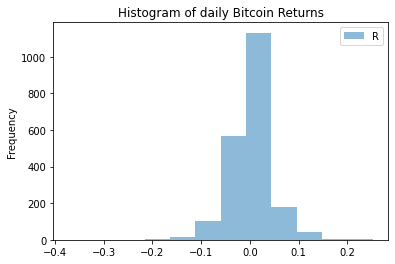

In [26]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

In [31]:
r_mean = BTC["r"].mean()
r_var = BTC["r"].var()
r_std = BTC["r"].std()
r_median = len(BTC.axes[0])

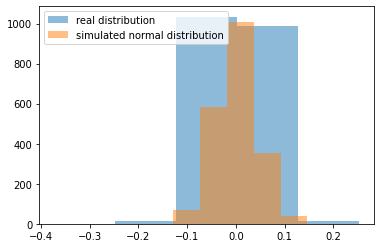

In [62]:
b = 5
r_simulated = np.random.normal(loc = r_mean, scale = r_std, size = r_median)
pyplot.hist(r_bitcoin.to_numpy(), b, alpha = 0.5, label = "real distribution")
pyplot.hist(r_simulated, b, alpha = 0.5, label = "simulated normal distribution")
pyplot.legend(loc = "upper left")
pyplot.show()

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS?

La principal diferencia es que la real distribution nunca cambia y 
la simulated distribution cada vez que lo ejecutamos va cambiando y va tratando de hacer un estimulado que se acerque al real distribution.